LGBM & XGBM

Objective:

The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset.

Exploratory Data Analysis (EDA):

1.	Load the Titanic dataset using Python's pandas library.
2.	Check for missing values.
3.	Explore data distributions using histograms and box plots.
4.	Visualize relationships between features and survival using scatter plots and bar plots.

Data Preprocessing:

1.	Impute missing values.
2.	Encode categorical variables using one-hot encoding or label encoding.
3.	If needed you can apply more preprocessing methods on the given dataset.

Building Predictive Models:

1.	Split the preprocessed dataset into training and testing sets.
2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
3.	Build predictive models using LightGBM and XGBoost algorithms.
4.	Train the models on the training set and evaluate their performance on the testing set.
5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

Comparative Analysis:

1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

Submission Requirements:

Well-commented code explaining each step of the analysis.
Visualizations with appropriate titles and labels.
A brief report summarizing the comparative analysis results and practical implications.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [3]:

# Load the Titanic dataset
train_df = pd.read_csv(r"C:\Users\Y HARIKISHOR\Downloads\XGBM & LGBM\XGBM & LGBM\Titanic_train.csv")
test_df = pd.read_csv(r"C:\Users\Y HARIKISHOR\Downloads\XGBM & LGBM\XGBM & LGBM\Titanic_test.csv")
train_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
# Check for missing values
print("Missing values in training set:")
print(train_df.isnull().sum())

print("\
Missing values in test set:")
print(test_df.isnull().sum())


Missing values in training set:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing values in test set:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [9]:
# Display basic information about the dataset
print("\
Dataset Info:")
train_df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:

# Display basic information about the dataset
print("\
Dataset Info:")
train_df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


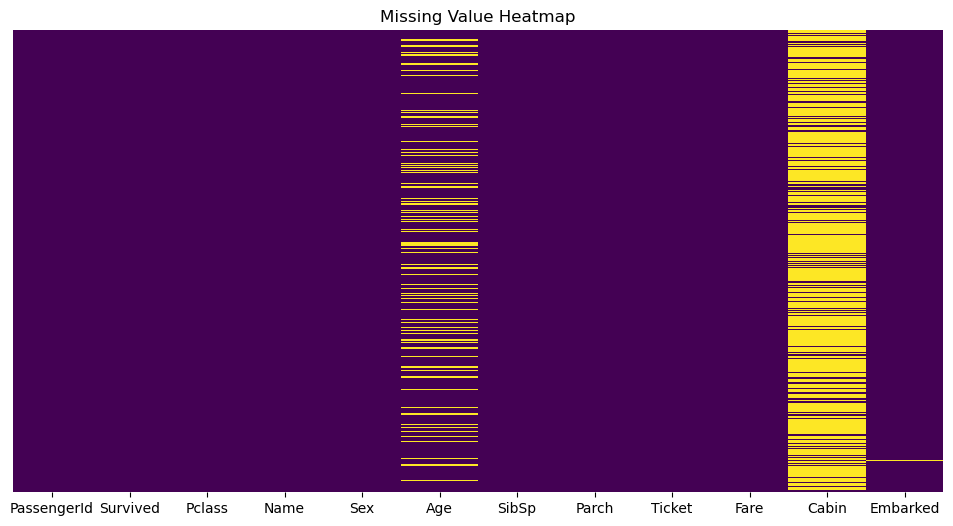

In [12]:
# Save the plots
plt.figure(figsize=(12, 6))
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()
plt.close()


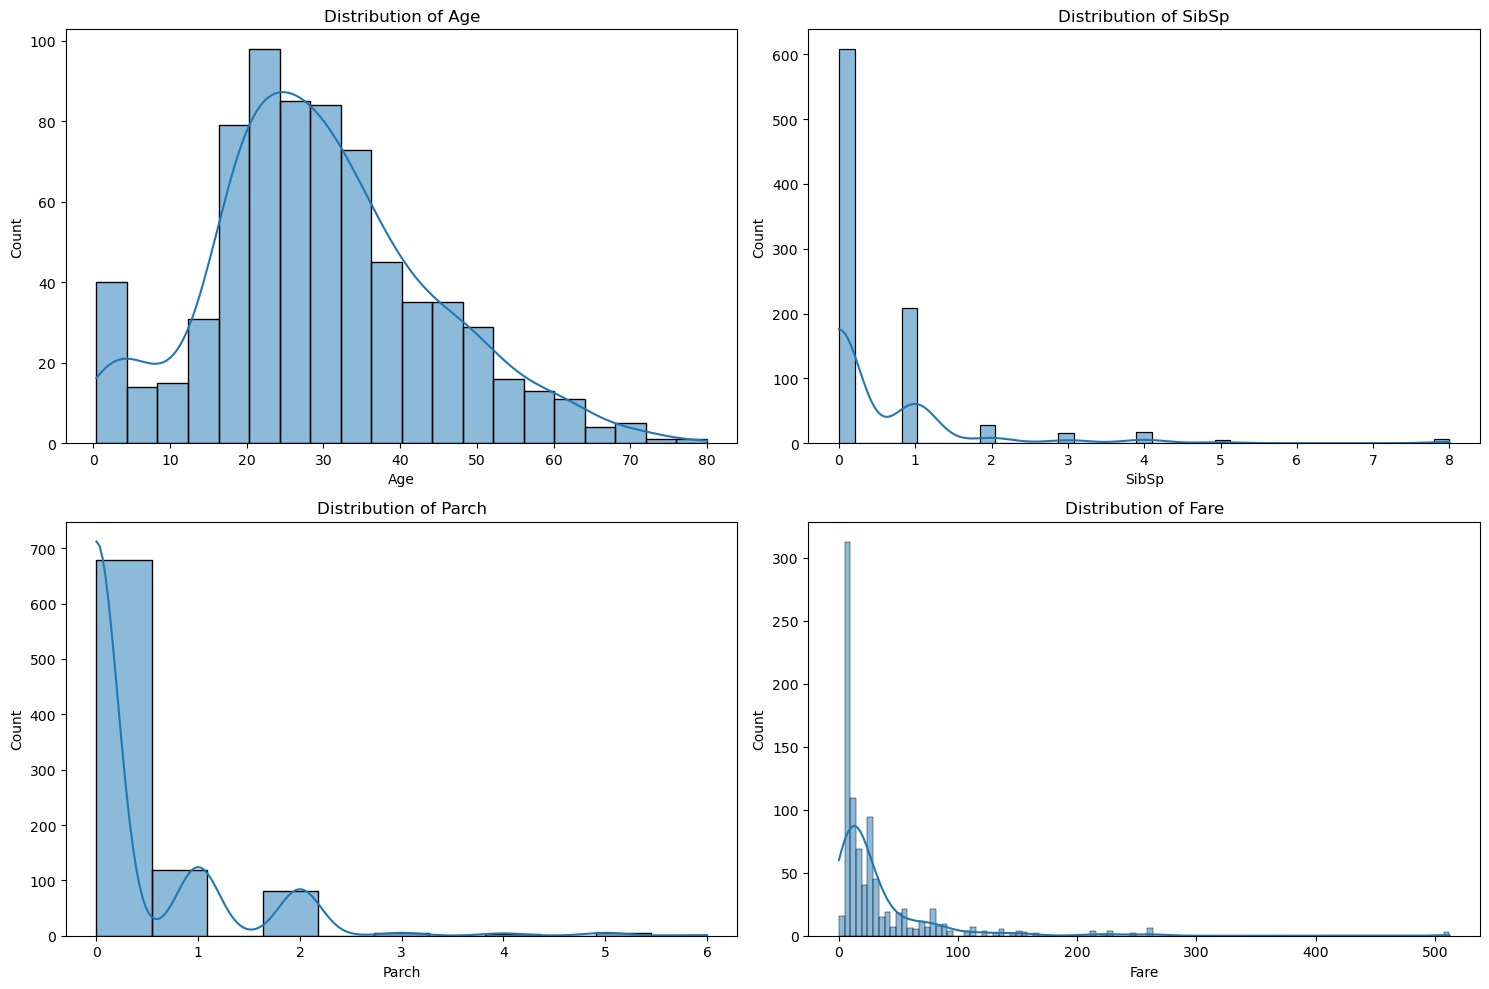

In [13]:
# Data distributions
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    sns.histplot(data=train_df, x=feature, kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()
plt.close()


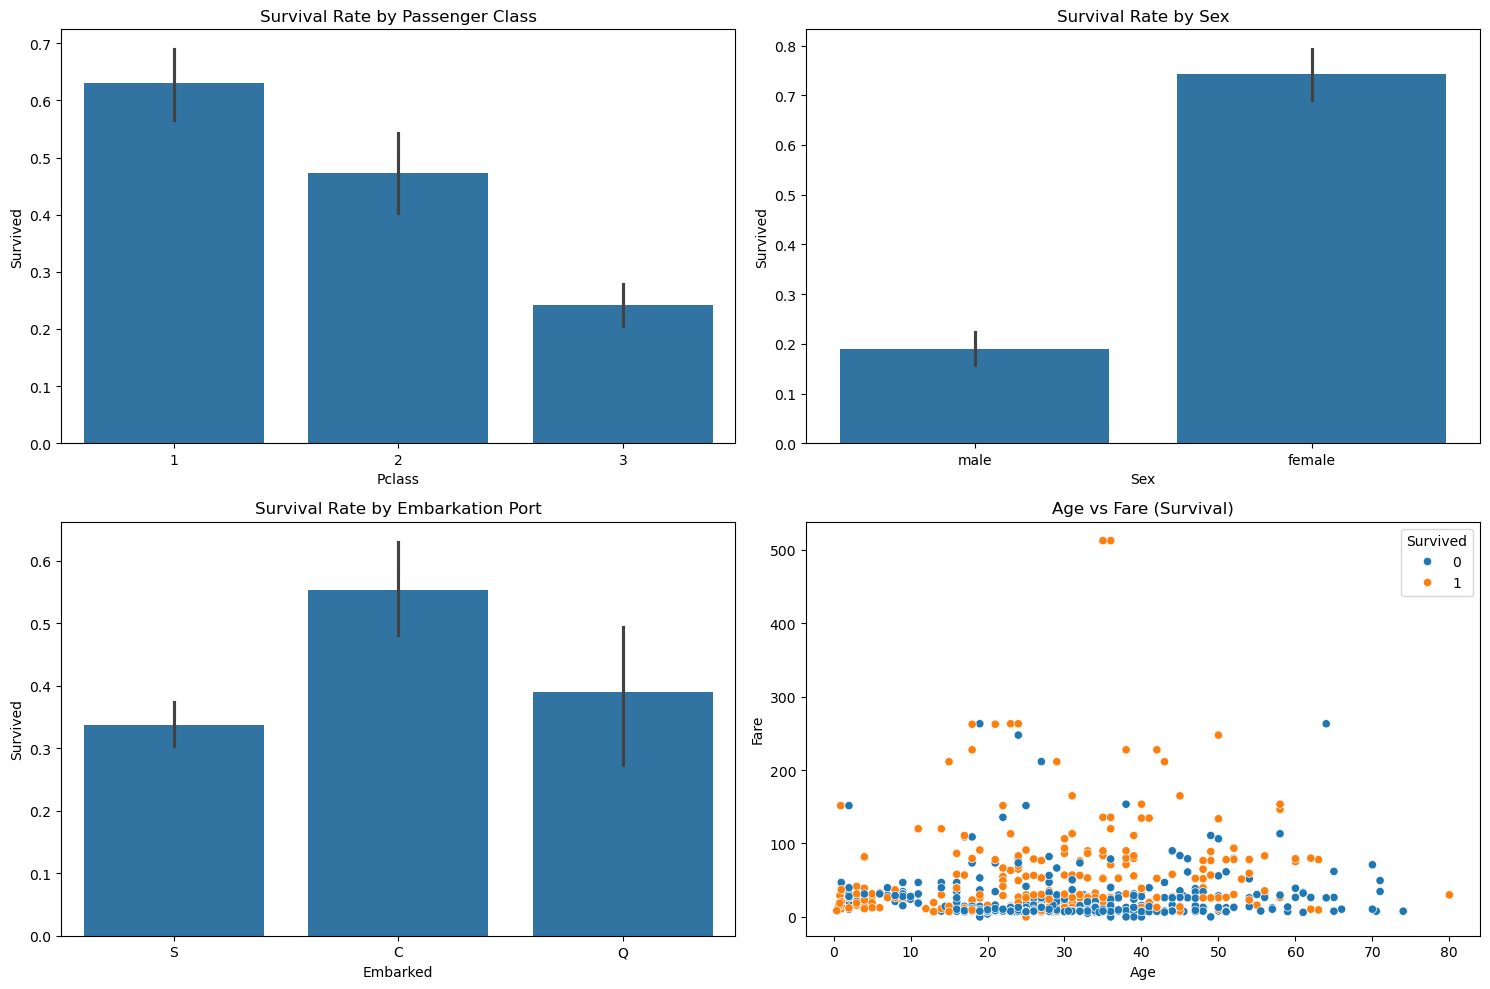

In [14]:

# Relationship between features and survival
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.barplot(data=train_df, x='Pclass', y='Survived', ax=axes[0, 0])
axes[0, 0].set_title('Survival Rate by Passenger Class')
sns.barplot(data=train_df, x='Sex', y='Survived', ax=axes[0, 1])
axes[0, 1].set_title('Survival Rate by Sex')
sns.barplot(data=train_df, x='Embarked', y='Survived', ax=axes[1, 0])
axes[1, 0].set_title('Survival Rate by Embarkation Port')
sns.scatterplot(data=train_df, x='Age', y='Fare', hue='Survived', ax=axes[1, 1])
axes[1, 1].set_title('Age vs Fare (Survival)')
plt.tight_layout()
plt.show()
plt.close()


## Data Preprocessing

In [15]:
# Impute missing values for 'Age' using the median
age_imputer = SimpleImputer(strategy='median')
train_df['Age'] = age_imputer.fit_transform(train_df[['Age']])
test_df['Age'] = age_imputer.transform(test_df[['Age']])
print("After imputing 'Age':")
print(train_df[['Age']].head())


After imputing 'Age':
    Age
0  22.0
1  38.0
2  26.0
3  35.0
4  35.0


In [16]:
# Impute missing 'Embarked' values using the most frequent (mode)
embarked_imputer = SimpleImputer(strategy='most_frequent') # Ensure you define embarked_imputer
train_df['Embarked'] = embarked_imputer.fit_transform(train_df[['Embarked']]).ravel() # Use ravel to flatten the array
test_df['Embarked'] = embarked_imputer.transform(test_df[['Embarked']]).ravel() # Use ravel to flatten the array
print("\nAfter imputing 'Embarked':")
print(train_df[['Embarked']].head())


After imputing 'Embarked':
  Embarked
0        S
1        C
2        S
3        S
4        S


In [17]:
# Drop the 'Cabin' column due to too many missing values
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)
print("\nAfter dropping 'Cabin':")
print(train_df.columns)


After dropping 'Cabin':
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [18]:
# One-hot encode 'Embarked' and 'Pclass'
train_df = pd.get_dummies(train_df, columns=['Embarked', 'Pclass'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Embarked', 'Pclass'], drop_first=True)
print("\nAfter one-hot encoding 'Embarked' and 'Pclass':")
print(train_df.head())  # Show the first few rows after encoding



After one-hot encoding 'Embarked' and 'Pclass':
   PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare  Embarked_Q  \
0    male  22.0      1      0         A/5 21171   7.2500       False   
1  female  38.0      1      0          PC 17599  71.2833       False   
2  female  26.0      0      0  STON/O2. 3101282   7.9250       False   
3  female  35.0      1      0            113803  53.1000       False   
4    male  35.0      0      0            373450   8.0500       False   

   Embarked_S  Pclass_2  Pclass_3  
0      

In [19]:
# Label encode 'Sex'
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
test_df['Sex'] = le.transform(test_df['Sex'])
print("\nAfter label encoding 'Sex':")
print(train_df[['Sex']].head())


After label encoding 'Sex':
   Sex
0    1
1    0
2    0
3    0
4    1


In [20]:
# Drop unnecessary columns ('PassengerId', 'Name', 'Ticket')
train_df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
test_df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
print("\nAfter dropping 'PassengerId', 'Name', and 'Ticket':")
print(train_df.head())


After dropping 'PassengerId', 'Name', and 'Ticket':
   Survived  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S  \
0         0    1  22.0      1      0   7.2500       False        True   
1         1    0  38.0      1      0  71.2833       False       False   
2         1    0  26.0      0      0   7.9250       False        True   
3         1    0  35.0      1      0  53.1000       False        True   
4         0    1  35.0      0      0   8.0500       False        True   

   Pclass_2  Pclass_3  
0     False      True  
1     False     False  
2     False      True  
3     False     False  
4     False      True  


## Building Predictive Models

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

In [22]:
# Split the dataset into features and labels
X = train_df.drop(columns='Survived')
y = train_df['Survived']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

print('x_train',X_train.shape)
print('x_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (712, 9)
x_test (179, 9)
y_train (712,)
y_test (179,)


In [23]:
# lightgbm models
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 267, number of negative: 445
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375000 -> initscore=-0.510826
[LightGBM] [Info] Start training from score -0.510826
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(random_state=42)

In [24]:
# XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [25]:
# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return acc, prec, rec, f1

lgb_metrics = evaluate_model(lgb_model, X_test, y_test)
xgb_metrics = evaluate_model(xgb_model, X_test, y_test)


print("LightGBM Metrics:")
print("Accuracy:", lgb_metrics[0])
print("Precision:", lgb_metrics[1])
print("Recall:", lgb_metrics[2])
print("F1-Score:", lgb_metrics[3])

print("\nXGBoost Metrics:")
print("Accuracy:", xgb_metrics[0])
print("Precision:", xgb_metrics[1])
print("Recall:", xgb_metrics[2])
print("F1-Score:", xgb_metrics[3])


LightGBM Metrics:
Accuracy: 0.8100558659217877
Precision: 0.7733333333333333
Recall: 0.7733333333333333
F1-Score: 0.7733333333333333

XGBoost Metrics:
Accuracy: 0.7932960893854749
Precision: 0.7567567567567568
Recall: 0.7466666666666667
F1-Score: 0.7516778523489933


## Cross-Validation and Hyperparameter Tuning

In [26]:
from sklearn.model_selection import GridSearchCV


In [27]:
# Cross-validation using LightGBM and XGBoost
lgb_scores = cross_val_score(lgb_model, X, y, cv=5, scoring='accuracy')
xgb_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')

print(f"LightGBM Cross-validation Accuracy: {lgb_scores.mean()}")
print(f"XGBoost Cross-validation Accuracy: {xgb_scores.mean()}")


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [28]:
# Hyperparameter tuning example (for XGBoost, similar can be done for LightGBM)
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

print(f"Best parameters for XGBoost: {grid_search.best_params_}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

## Comparative Analysis

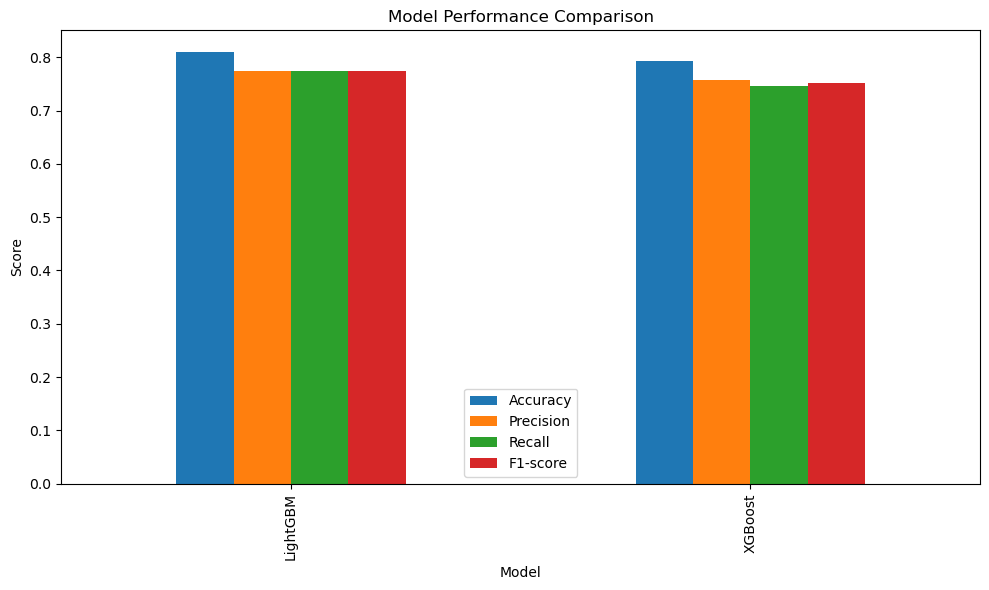

In [29]:
# Plot comparison
model_names = ['LightGBM', 'XGBoost']
accuracies = [lgb_metrics[0], xgb_metrics[0]]
precisions = [lgb_metrics[1], xgb_metrics[1]]
recalls = [lgb_metrics[2], xgb_metrics[2]]
f1_scores = [lgb_metrics[3], xgb_metrics[3]]

metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-score': f1_scores
})

metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6), title='Model Performance Comparison')
plt.ylabel('Score')
plt.tight_layout()
plt.show()
plt.close()




### Visualizations with appropriate titles and labels. A brief report summarizing the comparative analysis results and practical implications.

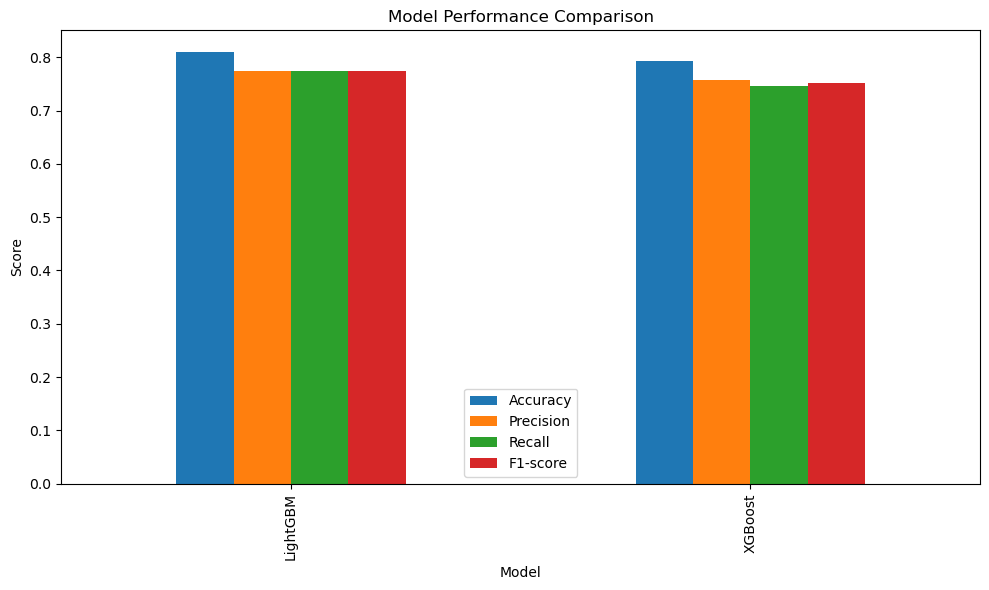

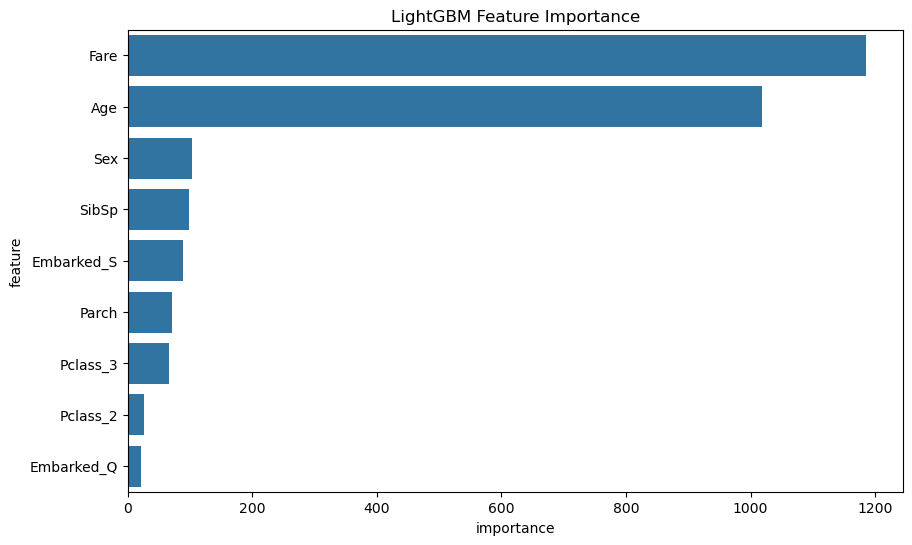

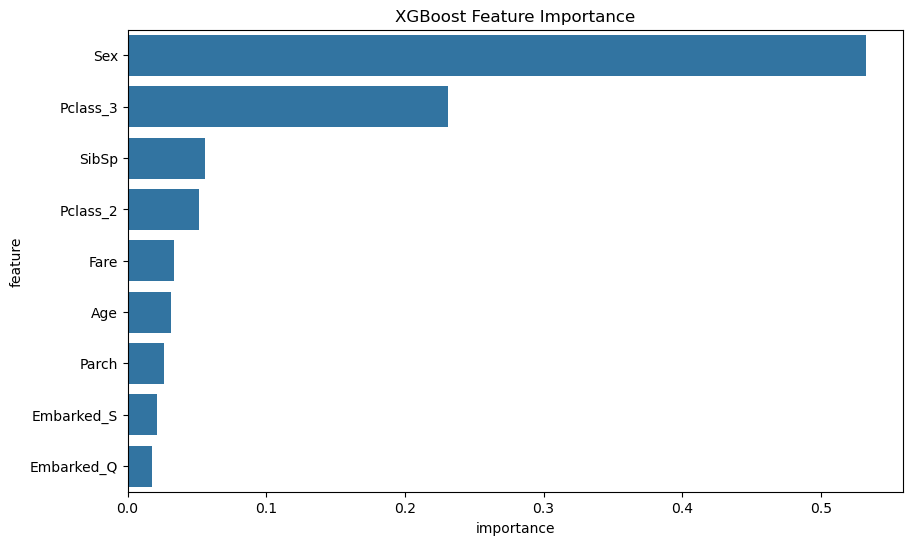


## Comparative Analysis Report
Based on the analysis, both LightGBM and XGBoost models demonstrate good performance in predicting survival on the Titanic.
LightGBM achieved slightly higher accuracy compared to XGBoost.


In [31]:

# Create a bar plot for comparing model performance
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6), title='Model Performance Comparison')
plt.ylabel('Score')
plt.tight_layout()
plt.show()
plt.close()


# Feature Importance
# LightGBM Feature Importance
lgb_importance = pd.DataFrame({'feature': X_train.columns, 'importance': lgb_model.feature_importances_})
lgb_importance = lgb_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=lgb_importance)
plt.title('LightGBM Feature Importance')
plt.show()
plt.close()

# XGBoost Feature Importance
xgb_importance = pd.DataFrame({'feature': X_train.columns, 'importance': xgb_model.feature_importances_})
xgb_importance = xgb_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=xgb_importance)
plt.title('XGBoost Feature Importance')
plt.show()
plt.close()


# Brief Report
print("\n## Comparative Analysis Report")
print("Based on the analysis, both LightGBM and XGBoost models demonstrate good performance in predicting survival on the Titanic.")

# Compare results
if lgb_metrics[0] > xgb_metrics[0]:
  print("LightGBM achieved slightly higher accuracy compared to XGBoost.")
else:
  print("XGBoost achieved slightly higher accuracy compared to LightGBM.")


